# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # reate endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | kyra
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | high rock
Processing Record 10 of Set 1 | stoyba
City not found. Skipping...
Processing Record 11 of Set 1 | bolshiye uki
City not found. Skipping...
Processing Record 12 of Set 1 | tromso
Processing Record 13 of Set 1 | ahuimanu
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | oshawa
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | port macquarie
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ma

Processing Record 36 of Set 4 | mitu
Processing Record 37 of Set 4 | alofi
Processing Record 38 of Set 4 | quatre cocos
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | saint-georges
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | sabang
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | tibati
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | mattawa
Processing Record 47 of Set 4 | moundsville
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | bom jardim
Processing Record 0 of Set 5 | esperance
Processing Record 1 of Set 5 | kasongo-lunda
Processing Record 2 of Set 5 | ngunguru
Processing Record 3 of Set 5 | rio gallegos
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | esil
Processing Record 7 of Set 5 | dayong
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of

Processing Record 22 of Set 8 | hobyo
Processing Record 23 of Set 8 | kenai
Processing Record 24 of Set 8 | muhororo
Processing Record 25 of Set 8 | kirovskiy
Processing Record 26 of Set 8 | novoagansk
Processing Record 27 of Set 8 | kieta
Processing Record 28 of Set 8 | port hardy
Processing Record 29 of Set 8 | brigantine
Processing Record 30 of Set 8 | adrasmon
Processing Record 31 of Set 8 | marystown
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | severo-kurilsk
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 37 of Set 8 | perth
Processing Record 38 of Set 8 | ulladulla
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | edd
Processing Record 42 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 43 of Set 8 | tsihombe
City not found

Processing Record 10 of Set 12 | huarmey
Processing Record 11 of Set 12 | los llanos de aridane
Processing Record 12 of Set 12 | presque isle
Processing Record 13 of Set 12 | flin flon
Processing Record 14 of Set 12 | fukue
Processing Record 15 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 12 | adrar
Processing Record 17 of Set 12 | griffith
Processing Record 18 of Set 12 | kinanah
City not found. Skipping...
Processing Record 19 of Set 12 | san policarpo
Processing Record 20 of Set 12 | nikolsk
Processing Record 21 of Set 12 | gunjur
Processing Record 22 of Set 12 | tazmalt
Processing Record 23 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 24 of Set 12 | sumen
City not found. Skipping...
Processing Record 25 of Set 12 | benguela
Processing Record 26 of Set 12 | getashen
Processing Record 27 of Set 12 | susuman
Processing Record 28 of Set 12 | samana
Processing Record 29 of Set 12 | kovur
Processing Record 30 of Set 12 | kodinsk
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,7.55,93,67,4.32,BR,1667446018
1,kyra,49.5776,111.9753,-2.64,46,1,2.60,RU,1667446019
2,hermanus,-34.4187,19.2345,16.56,88,31,3.22,ZA,1667446020
3,hilo,19.7297,-155.0900,26.85,81,20,3.60,US,1667446020
4,hobart,-42.8794,147.3294,17.81,51,75,8.23,AU,1667445851


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,7.55,93,67,4.32,BR,1667446018
1,kyra,49.5776,111.9753,-2.64,46,1,2.60,RU,1667446019
2,hermanus,-34.4187,19.2345,16.56,88,31,3.22,ZA,1667446020
3,hilo,19.7297,-155.0900,26.85,81,20,3.60,US,1667446020
4,hobart,-42.8794,147.3294,17.81,51,75,8.23,AU,1667445851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

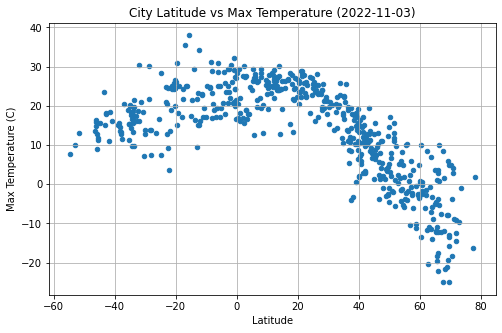

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", grid=True,x='Lat',y='Max Temp',
                  title=f"City Latitude vs Max Temperature ({pd.to_datetime('today').date()})",
                  figsize=(8,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

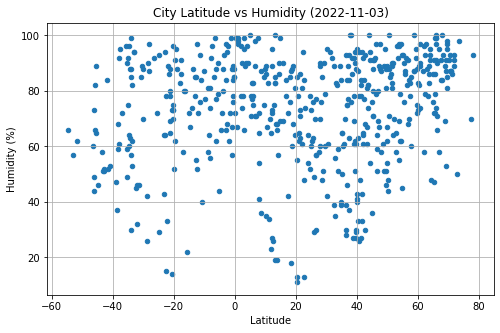

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", grid=True,x='Lat',y='Humidity',
                  title=f"City Latitude vs Humidity ({pd.to_datetime('today').date()})",
                  figsize=(8,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

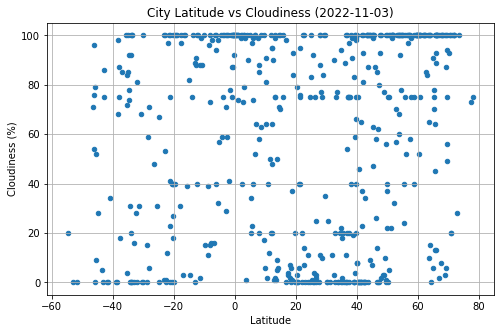

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", grid=True,x='Lat',y='Cloudiness',
                  title=f"City Latitude vs Cloudiness ({pd.to_datetime('today').date()})",
                  figsize=(8,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

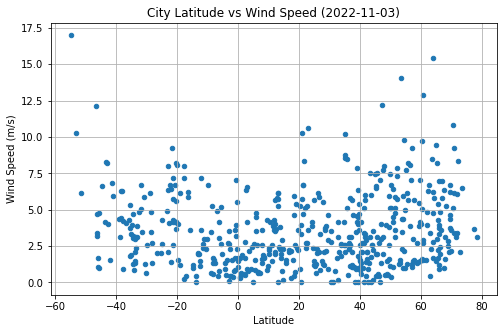

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", grid=True,x='Lat',y='Wind Speed',
                  title=f"City Latitude vs Wind Speed ({pd.to_datetime('today').date()})",
                  figsize=(8,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def linearplot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    a=int(input('Where do you want to put the equation on this graph? x-coordinate ='))
    b=int(input('y-coordinate ='))
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    print(f"The r-squared is: {rvalue**2}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_city_df=city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
north_hem_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kyra,49.5776,111.9753,-2.64,46,1,2.60,RU,1667446019
3,hilo,19.7297,-155.0900,26.85,81,20,3.60,US,1667446020
6,yellowknife,62.4560,-114.3525,-11.71,79,100,6.69,CA,1667445920
7,high rock,26.6208,-78.2833,23.01,77,25,5.90,BS,1667446021
8,tromso,69.6496,18.9570,5.01,81,49,3.60,NO,1667446022


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,7.55,93,67,4.32,BR,1667446018
2,hermanus,-34.4187,19.2345,16.56,88,31,3.22,ZA,1667446020
4,hobart,-42.8794,147.3294,17.81,51,75,8.23,AU,1667445851
5,east london,-33.0153,27.9116,17.52,94,0,3.09,ZA,1667446020
11,saldanha,-33.0117,17.9442,16.03,94,16,3.87,ZA,1667446024


###  Temperature vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate =10
y-coordinate =-10
The r-squared is: 0.7397772061033682


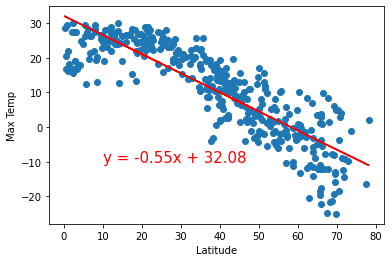

In [67]:
# Linear regression on Northern Hemisphere
linearplot(north_hem_city_df['Lat'],north_hem_city_df['Max Temp'])
plt.ylabel('Max Temp')
plt.show()

Where do you want to put the equation on this graph? x-coordinate =-50
y-coordinate =30
The r-squared is: 0.31348899692847954


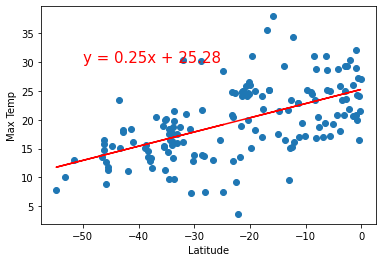

In [68]:
# Linear regression on Southern Hemisphere
linearplot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** The overall trend is that the closer to the equator (ie. latitude closer to 0), the higher the temperature. However, the correlation seems to be stronger for the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate =40
y-coordinate =20
The r-squared is: 0.03429073322177948


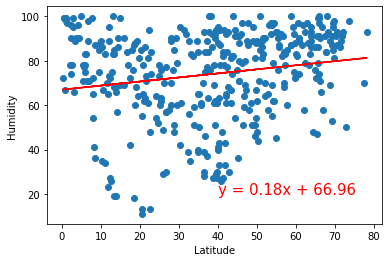

In [71]:
# Northern Hemisphere
linearplot(north_hem_city_df['Lat'],north_hem_city_df['Humidity'])
plt.ylabel('Humidity')
plt.show()

Where do you want to put the equation on this graph? x-coordinate =-55
y-coordinate =20
The r-squared is: 0.07394708162930885


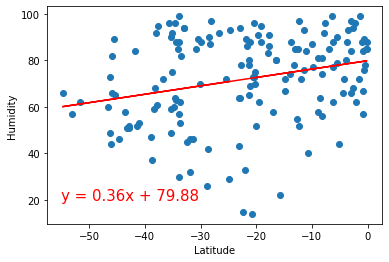

In [74]:
# Southern Hemisphere
linearplot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** Humidity does not seem to be heavily affected by distance to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate =55
y-coordinate =30
The r-squared is: 0.028889860550761856


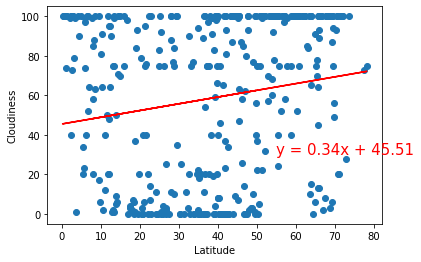

In [75]:
# Northern Hemisphere
linearplot(north_hem_city_df['Lat'],north_hem_city_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.show()

Where do you want to put the equation on this graph? x-coordinate =-40
y-coordinate =50
The r-squared is: 0.1230333624151242


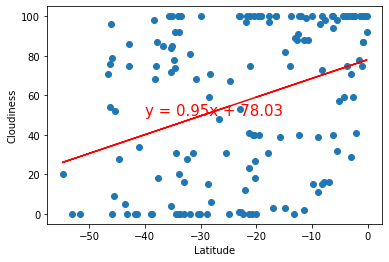

In [77]:
# Southern Hemisphere
linearplot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** There are extremes (0 or 100% cloudiness) in both northern and sourthern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

Where do you want to put the equation on this graph? x-coordinate =0
y-coordinate =15
The r-squared is: 0.07256737649178613


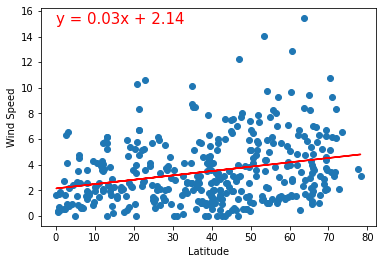

In [78]:
# Northern Hemisphere
linearplot(north_hem_city_df['Lat'],north_hem_city_df['Wind Speed'])
plt.ylabel('Wind Speed')
plt.show()

Where do you want to put the equation on this graph? x-coordinate =-30
y-coordinate =15
The r-squared is: 0.14148974006273368


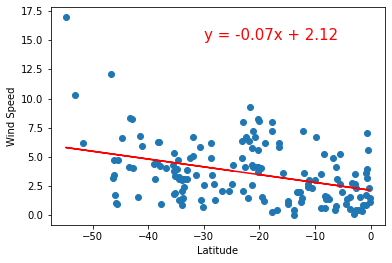

In [79]:
# Southern Hemisphere
linearplot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** There is a weak trend of increasing wind speed as the distance from the equator increases.